In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
#from wordcloud import WordCloud
#from wordcloud import STOPWORDS
#import nltk 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import scikitplot as skplt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
#from sklearn import svm
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.neural_network import MLPClassifier

D:\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [17]:
df = pd.read_csv('C:/Users/amanpreet_singh/Documents/_practice/Homework/Assignment1/Consumer_Complaints.csv')

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225834 entries, 0 to 1225833
Data columns (total 18 columns):
Date received                   1225834 non-null object
Product                         1225834 non-null object
Sub-product                     990668 non-null object
Issue                           1225834 non-null object
Sub-issue                       701962 non-null object
Consumer complaint narrative    369253 non-null object
Company public response         420243 non-null object
Company                         1225834 non-null object
State                           1208002 non-null object
ZIP code                        1118492 non-null object
Tags                            167409 non-null object
Consumer consent provided?      656065 non-null object
Submitted via                   1225834 non-null object
Date sent to company            1225834 non-null object
Company response to consumer    1225828 non-null object
Timely response?                1225834 non-null obje

In [19]:
col = ['Product', 'Consumer complaint narrative', 'Sub-product']
df = df[col]
df = df[pd.notnull(df['Consumer complaint narrative'])]
df = df[pd.notnull(df['Sub-product'])]
df.columns = ['Product', 'Consumer_complaint_narrative', 'Sub_product']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317080 entries, 762 to 855910
Data columns (total 3 columns):
Product                         317080 non-null object
Consumer_complaint_narrative    317080 non-null object
Sub_product                     317080 non-null object
dtypes: object(3)
memory usage: 9.7+ MB


In [20]:
df.head()

,Product,Consumer_complaint_narrative,Sub_product
762,Debt collection,Excessive calling at unannounced times.,Medical debt
1075,"Credit reporting, credit repair services, or o...",XXXX XXXX was given a request to close XXXX/XX...,Credit reporting
1421,"Credit reporting, credit repair services, or o...","On XX/XX/2018, I reached out to XXXX, about wh...",Credit reporting
1522,Mortgage,VIP mortgage XXXX XXXX run my credit before in...,FHA mortgage
1645,Debt collection,.What address were the Validation notices mail...,Medical debt


In [21]:
list(df.columns)

['Product', 'Consumer_complaint_narrative', 'Sub_product']

In [22]:
df = df[:3000]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 762 to 26253
Data columns (total 3 columns):
Product                         3000 non-null object
Consumer_complaint_narrative    3000 non-null object
Sub_product                     3000 non-null object
dtypes: object(3)
memory usage: 93.8+ KB


In [24]:
#df.to_csv("file.csv",)

In [25]:
#del df

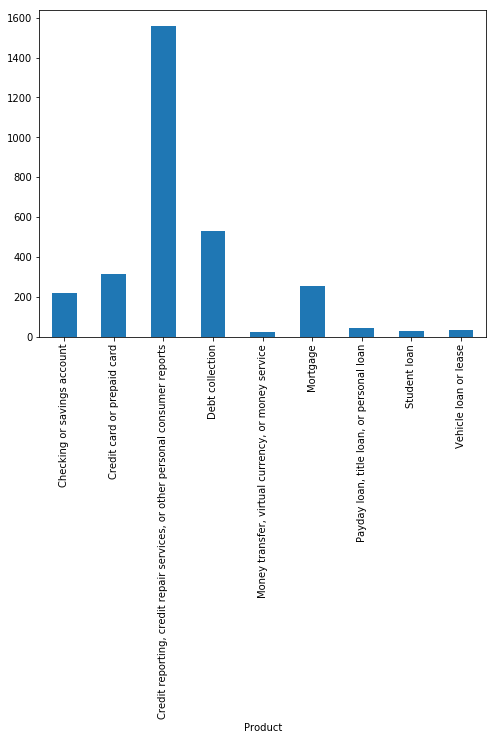

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Sub_product.count().plot.bar(ylim=0)
plt.show()

In [20]:
df.drop(df.index[df['Product']=='Credit reporting, credit repair services, or other personal consumer reports'][:950], inplace=True)

In [27]:
#df.drop(df.index[df['Product']=='Debt collection'][:500], inplace=True)

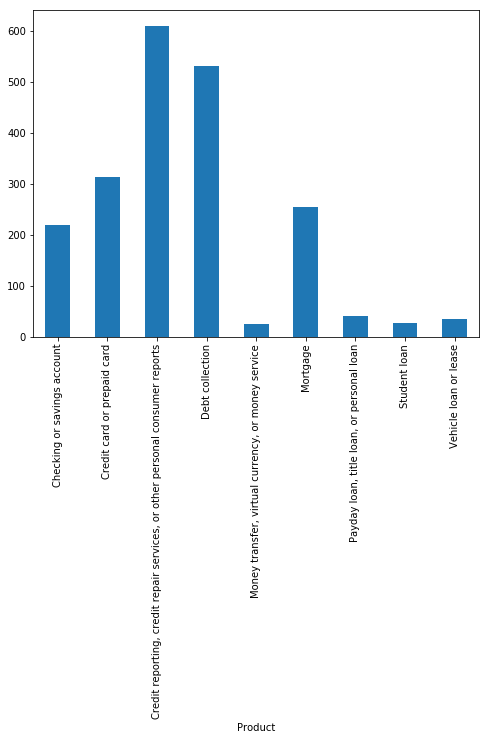

In [21]:
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 762 to 26253
Data columns (total 3 columns):
Product                         3000 non-null object
Consumer_complaint_narrative    3000 non-null object
Sub_product                     3000 non-null object
dtypes: object(3)
memory usage: 93.8+ KB


In [29]:
df.index = range(0, df.shape[0])

In [31]:
df.info()
print(df.index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
Product                         3000 non-null object
Consumer_complaint_narrative    3000 non-null object
Sub_product                     3000 non-null object
dtypes: object(3)
memory usage: 70.4+ KB
RangeIndex(start=0, stop=3000, step=1)


In [32]:
print(df.index)

RangeIndex(start=0, stop=3000, step=1)


In [33]:
df.groupby(['Product', 'Sub_product']).count()

Consumer_complaint_narrative
Product                                            Sub_product                                                             
Checking or savings account                        CD (Certificate of Deposit)                                            1
                                                   Checking account                                                     186
                                                   Other banking product or service                                      11
                                                   Personal line of credit                                                2
                                                   Savings account                                                       18
Credit card or prepaid card                        General-purpose credit card or charge card                           222
                                                   General-purpose prepaid card                                          10
                                                   Government benefit card                                                2
                                                   Payroll card                                                           3
                                                   Store credit card                                                     75
Credit reporting, credit repair services, or ot... Credit repair services                                                 3
                                                   Credit reporting                                                    1537
                                                   Other personal consumer report                                        19
Debt collection                                    Auto debt                                                             27
                                                   Credit card debt                                                      72
                                                   Federal student loan debt                                              8
                                                   I do not know                                                         99
                                                   Medical debt                                                         115
                                                   Mortgage debt                                                         19
                                                   Other debt                                                           174
                                                   Payday loan debt                                                       9
                                                   Private student loan debt                                              8
Money transfer, virtual currency, or money service Check cashing service                                                  1
                                                   Domestic (US) money transfer                                          12
                                                   International money transfer                                           3
                                                   Mobile or digital wallet                                               8
Mortgage                                           Conventional home mortgage                                           142
                                                   FHA mortgage                                                          62
                                                   Home equity loan or line of credit (HELOC)                             7
                                                   Other type of mortgage                                                13
                                                   Reverse mortgage                                                       3
   

In [26]:
df['Product'].unique()

array(['Debt collection', 'Mortgage',
       'Payday loan, title loan, or personal loan',
       'Credit card or prepaid card', 'Checking or savings account',
       'Student loan',
       'Money transfer, virtual currency, or money service',
       'Vehicle loan or lease',
       'Credit reporting, credit repair services, or other personal consumer reports'], dtype=object)

In [27]:
labels = df['Sub_product']
print(type(labels))
print(labels.shape)
print(labels.index)

<class 'pandas.core.series.Series'>
(2050,)
RangeIndex(start=0, stop=2050, step=1)


In [18]:
"""
#extracting n-grams from the text data
countvect= CountVectorizer(ngram_range=(2,2),)
countvect.fit(df['Consumer_complaint_narrative'])
#preparing for training set
features =countvect.transform(df['Consumer_complaint_narrative'])
"""

"\n#extracting n-grams from the text data\ncountvect= CountVectorizer(ngram_range=(2,2),)\ncountvect.fit(df['Consumer_complaint_narrative'])\n#preparing for training set\nfeatures =countvect.transform(df['Consumer_complaint_narrative'])\n"

In [36]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
Total_Dictionary_TFIDF = tfidf_vectorizer.fit(df['Consumer_complaint_narrative'])
features = Total_Dictionary_TFIDF.transform(df['Consumer_complaint_narrative'])

In [37]:
print(type(features))
print(features.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(3000, 9507)


In [38]:
features = pd.DataFrame(features.todense())

In [39]:
print(type(features))
print(features.shape)
print(features.index)

<class 'pandas.core.frame.DataFrame'>
(3000, 9507)
RangeIndex(start=0, stop=3000, step=1)


In [43]:
from sklearn.externals import joblib

In [49]:
data_dict = {}

In [72]:
count = 0
for target_column in ('Product', 'Sub_product'):
    count += 1
    labels = df[target_column]    
    if target_column == 'Sub_product':
        dummies = pd.get_dummies(df['Product'], prefix="Product", drop_first=False)
        features = pd.concat([features, dummies], axis=1)        
    
    trainset, testset, trainlabel, testlabel = train_test_split(features, labels, test_size=0.20, random_state=42)
    #Creating the model using naive bayes
    clf=MultinomialNB()
    clf.fit(trainset,trainlabel)
    filename = 'model_' + target_column + '.sav'
    joblib.dump(clf, filename)
    predicted_values = clf.predict(testset)
    #print(predicted_values)
    #predictions=dict()
    acurracy = accuracy_score(testlabel,predicted_values)
    #predictions['Naive Bayes']=acurracy*100
    print("The accuracy of the model is {}%".format(acurracy*100 ))
    data_dict[count] = []
    data_dict[count].append(trainset)
    data_dict[count].append(testset)
    data_dict[count].append(trainlabel)
    data_dict[count].append(testlabel)

The accuracy of the model is 95.33333333333334%
The accuracy of the model is 77.33333333333333%


In [73]:
data_dict

{1: [             0    1    2    3    4    5    6    7    8    9  \
  642   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
  700   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
  226   0.078048  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
  1697  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
  1010  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
  1572  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
  776   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
  1730  0.012491  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
  2826  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
  2228  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
  2794  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
  464   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
  2651  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
  1093  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
  1271  0.148191  0.0 

In [53]:
target_columns = ['Product', 'Sub_product']
loaded_model = joblib.load(filename)
predicted_values = loaded_model.predict(testset)
result_df = pd.DataFrame()
for key, target_column in (data_dict, target_columns):
    loaded_model = joblib.load('model_' + target_column)
    print(len(data_dict[key]))

4
4


In [74]:
model_temp = joblib.load('model_Product.sav')

In [82]:
model_temp2 = joblib.load('model_Sub_product.sav')

In [75]:
df_temp = pd.DataFrame()

In [76]:
df_temp['test_labels'] = data_dict[1][3]

In [80]:
df_temp['pred_labels'] = model_temp.predict(data_dict[1][1])

In [86]:
df_temp['test_labels_SP'] = list(data_dict[2][3])

In [89]:
df_temp['pred_labels_SP'] = model_temp2.predict(data_dict[2][1])

In [92]:
temp1 = model_temp2.predict_proba(data_dict[2][1])

In [99]:
temp2 = model_temp2.classes_

In [187]:
for arg, cls in sorted(zip(temp1[5], model_temp2.classes_), reverse=True):
    print("{0}, {1}".format(arg,cls))

0.8354072634661162, Other debt
0.1004029102702778, Medical debt
0.03156716749278656, I do not know
0.02735886780204326, Credit reporting
0.005136581332990395, Credit card debt
6.166451143952272e-05, Auto debt
3.3375490459106405e-05, General-purpose credit card or charge card
1.3103124256850387e-05, Checking account
1.017277713555813e-05, Mortgage debt
5.4593545835656536e-06, Conventional home mortgage
1.1857584826712165e-06, Store credit card
9.643295864477746e-07, Private student loan debt
4.5004455973209735e-07, FHA mortgage
1.7575212806313843e-07, Payday loan debt
1.6916943070303864e-07, Federal student loan debt
1.1165888786530492e-07, Loan
1.0360542300814186e-07, VA mortgage
5.8474983852081625e-08, Other personal consumer report
4.448899892117036e-08, Installment loan
3.891797982690396e-08, Private student loan
3.6004268180291785e-08, Savings account
1.422385383555326e-08, Domestic (US) money transfer
1.187236496289631e-08, Payday loan
1.1307579913861091e-08, Other type of mortgag

In [78]:
df_temp.index = range(0, df_temp.shape[0])
df_temp.index

RangeIndex(start=0, stop=600, step=1)

In [183]:
prod_subProd_mapping = {}
print(prod_subProd_mapping.keys())

dict_keys([])


In [184]:
for index, row in df.iterrows():
    if row['Product'] not in prod_subProd_mapping.keys():
        prod_subProd_mapping[row['Product']] = []    
    if row['Sub_product'] not in prod_subProd_mapping[row['Product']]:
        prod_subProd_mapping[row['Product']].append(row['Sub_product'])

In [185]:
prod_subProd_mapping

{'Checking or savings account': ['Checking account',
  'Savings account',
  'Personal line of credit',
  'Other banking product or service',
  'CD (Certificate of Deposit)'],
 'Credit card or prepaid card': ['Store credit card',
  'General-purpose credit card or charge card',
  'General-purpose prepaid card',
  'Government benefit card',
  'Payroll card'],
 'Credit reporting, credit repair services, or other personal consumer reports': ['Credit reporting',
  'Other personal consumer report',
  'Credit repair services'],
 'Debt collection': ['Medical debt',
  'Other debt',
  'I do not know',
  'Auto debt',
  'Credit card debt',
  'Mortgage debt',
  'Payday loan debt',
  'Federal student loan debt',
  'Private student loan debt'],
 'Money transfer, virtual currency, or money service': ['Domestic (US) money transfer',
  'Mobile or digital wallet',
  'International money transfer',
  'Check cashing service'],
 'Mortgage': ['FHA mortgage',
  'VA mortgage',
  'Conventional home mortgage',
  

In [189]:
changed_pred_labels_SP = []
for predicted_prod, predicted_sub_prd, probs in zip(list(df_temp['pred_labels']), list(df_temp['pred_labels_SP']), temp1):    
        #print("{0}, {1}".format(arg,cls))
    for arg, cls in sorted(zip(probs, model_temp2.classes_), reverse=True):
        if cls in prod_subProd_mapping[predicted_prod]:
            changed_pred_labels_SP.append(cls)
            break
        else:
            continue

In [190]:
df_temp['changed_pred_labels_SP'] = changed_pred_labels_SP

In [191]:
df_temp

,test_labels,pred_labels,test_labels_SP,pred_labels_SP,changed_pred_labels_SP
0,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...",Credit reporting,Credit reporting,Credit reporting
1,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...",Credit reporting,Credit reporting,Credit reporting
2,Credit card or prepaid card,Credit card or prepaid card,General-purpose credit card or charge card,General-purpose credit card or charge card,General-purpose credit card or charge card
3,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...",Credit reporting,Credit reporting,Credit reporting
4,Credit card or prepaid card,Credit card or prepaid card,General-purpose credit card or charge card,General-purpose credit card or charge card,General-purpose credit card or charge card
5,Debt collection,Debt collection,Medical debt,Other debt,Other debt
6,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...",Credit reporting,Credit reporting,Credit reporting
7,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...",Credit reporting,Credit reporting,Credit reporting
8,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...",Credit reporting,Credit reporting,Credit reporting
9,Mortgage,Mortgage,FHA mortgage,Conventional home mortgage,Conventional home mortgage


In [34]:
#categorical field Products so making it one-hot-encoded
dummies = pd.get_dummies(df['Product'], prefix="Product", drop_first=False)

In [35]:
print(type(dummies))
print(dummies.shape)
print(dummies.index)

<class 'pandas.core.frame.DataFrame'>
(2050, 9)
RangeIndex(start=0, stop=2050, step=1)


In [36]:
#del df

In [37]:
dummies.head()

,Product_Checking or savings account,Product_Credit card or prepaid card,"Product_Credit reporting, credit repair services, or other personal consumer reports",Product_Debt collection,"Product_Money transfer, virtual currency, or money service",Product_Mortgage,"Product_Payday loan, title loan, or personal loan",Product_Student loan,Product_Vehicle loan or lease
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0


In [39]:
print(df.index)
print(features.index)
print(dummies.index)
print(labels.index)

RangeIndex(start=0, stop=2050, step=1)
RangeIndex(start=0, stop=2050, step=1)
RangeIndex(start=0, stop=2050, step=1)
RangeIndex(start=0, stop=2050, step=1)


In [30]:
"""
features.index = range(0, features.shape[0])
dummies.index = range(0, dummies.shape[0])
labels.index = range(0, labels.shape[0])
"""

In [40]:
features = pd.concat([features, dummies], axis=1)

In [41]:
print(type(features))
print(features.shape)
print(features.index)

<class 'pandas.core.frame.DataFrame'>
(2050, 113187)
RangeIndex(start=0, stop=2050, step=1)


In [42]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Columns: 113187 entries, 0 to Product_Vehicle loan or lease
dtypes: float64(113178), uint8(9)
memory usage: 1.7 GB


In [43]:
trainset, testset, trainlabel, testlabel = train_test_split(features, labels, test_size=0.20, random_state=42)

In [47]:
all_indexes = {}
all_indexes['train_features'] = [trainset.index]
all_indexes['test_features'] = [testset.index]
all_indexes['train_labels'] = [trainlabel.index]
all_indexes['test_labels'] = [testlabel.index]

In [48]:
print(all_indexes)

{'train_labels': [Int64Index([1857,  570,  926,  670, 1674, 1229,  950,  464,  432,  998,
            ...
            1238,  466,  121, 1638, 1044, 1724, 1095, 1130, 1294,  860],
           dtype='int64', length=1640)], 'train_features': [Int64Index([1857,  570,  926,  670, 1674, 1229,  950,  464,  432,  998,
            ...
            1238,  466,  121, 1638, 1044, 1724, 1095, 1130, 1294,  860],
           dtype='int64', length=1640)], 'test_labels': [Int64Index([1808,  694,  906,  544, 1847, 1566, 1572,  944,  818,  829,
            ...
            1466, 1359,   67,  993, 1647, 1061,  705, 1524, 1509, 1447],
           dtype='int64', length=410)], 'test_features': [Int64Index([1808,  694,  906,  544, 1847, 1566, 1572,  944,  818,  829,
            ...
            1466, 1359,   67,  993, 1647, 1061,  705, 1524, 1509, 1447],
           dtype='int64', length=410)]}


In [49]:
#Creating the model using naive bayes
clf=MultinomialNB()
clf.fit(trainset,trainlabel)
predicted_values = clf.predict(testset)
print(predicted_values)
predictions=dict()
acurracy = accuracy_score(testlabel,predicted_values)
predictions['Naive Bayes']=acurracy*100
#confusionmatrix = confusion_matrix(testlabel,predicted_values)
print("The accuracy of the model is {}%".format(acurracy*100 ))
#print(confusionmatrix)
#skplt.metrics.plot_confusion_matrix(testlabel,predicted_values, normalize=True)

['General-purpose credit card or charge card' 'Other debt'
 'Credit reporting' 'Other debt' 'Checking account' 'Checking account'
 'Credit reporting' 'Credit reporting' 'Checking account'
 'Credit reporting' 'Conventional home mortgage' 'Credit reporting'
 'Other debt' 'Checking account' 'Other debt' 'Credit reporting'
 'Conventional home mortgage' 'Credit reporting' 'Credit reporting'
 'Credit reporting' 'Credit reporting' 'Credit reporting'
 'Conventional home mortgage' 'Credit reporting' 'Credit reporting'
 'Other debt' 'General-purpose credit card or charge card'
 'Credit reporting' 'General-purpose credit card or charge card'
 'Credit reporting' 'Checking account'
 'General-purpose credit card or charge card'
 'General-purpose credit card or charge card'
 'General-purpose credit card or charge card'
 'General-purpose credit card or charge card' 'Credit reporting'
 'Credit reporting' 'Conventional home mortgage'
 'General-purpose credit card or charge card' 'Credit reporting'
 'Con

In [50]:
#using K-Nearest to predict 
KNN=KNeighborsClassifier()
KNN.fit(trainset,trainlabel)
predictedValues = KNN.predict(testset)
print(predictedValues)
acurracy_KNN = accuracy_score(testlabel,predictedValues)
predictions['KNN']=acurracy_KNN*100
print("The accuracy of the model is {}%".format(acurracy_KNN*100))
#confusion_matrix_KNN = confusion_matrix(testlabel,predictedValues)
#print(confusion_matrix_KNN)

['General-purpose credit card or charge card' 'Other debt'
 'Credit reporting' 'Other debt' 'Checking account' 'Savings account'
 'Credit reporting' 'Credit reporting' 'Checking account'
 'Credit reporting' 'FHA mortgage' 'Credit reporting' 'Credit card debt'
 'Checking account' 'I do not know' 'Credit reporting'
 'Conventional home mortgage' 'Credit reporting' 'Credit reporting'
 'Credit reporting' 'Credit reporting' 'Credit reporting'
 'Conventional home mortgage' 'Credit reporting' 'Installment loan'
 'Medical debt' 'Store credit card' 'Other debt'
 'General-purpose credit card or charge card' 'Credit reporting'
 'Checking account' 'General-purpose credit card or charge card'
 'Store credit card' 'General-purpose credit card or charge card'
 'General-purpose credit card or charge card' 'Conventional home mortgage'
 'Installment loan' 'FHA mortgage'
 'General-purpose credit card or charge card' 'Credit reporting'
 'Conventional home mortgage' 'FHA mortgage' 'Other debt'
 'Conventiona

In [51]:
#using Decision Tree Classifier to model 
DT=DecisionTreeClassifier()
DT.fit(trainset,trainlabel)
predicted_values_DT = DT.predict(testset)
print(predicted_values_DT)
acurracy_DT = accuracy_score(testlabel,predicted_values_DT)
predictions['DecisionTree']=acurracy_DT*100
print("The accuracy of the model is {}%".format(acurracy_DT*100 ))
#print(testset.v1)
#confusion_matrix_DT = confusion_matrix(testlabel,predicted_values_DT)
#print(confusion_matrix_DT)

['General-purpose credit card or charge card' 'Mortgage debt'
 'Credit reporting' 'Medical debt' 'Checking account' 'Checking account'
 'Credit reporting' 'Credit reporting' 'Checking account'
 'Credit reporting' 'FHA mortgage' 'Credit reporting' 'Other debt'
 'Other banking product or service' 'Medical debt' 'Credit reporting'
 'VA mortgage' 'Credit reporting' 'Credit reporting' 'Credit reporting'
 'Credit reporting' 'Credit reporting' 'Conventional home mortgage'
 'Credit reporting' 'Installment loan' 'Auto debt'
 'General-purpose credit card or charge card' 'Other debt'
 'Store credit card' 'Credit reporting' 'Checking account'
 'General-purpose credit card or charge card' 'Store credit card'
 'General-purpose credit card or charge card'
 'General-purpose credit card or charge card' 'Conventional home mortgage'
 'Personal line of credit' 'Conventional home mortgage'
 'General-purpose credit card or charge card' 'Credit reporting'
 'Home equity loan or line of credit (HELOC)' 'Conven

In [52]:
#Training the model using SVM Classifier
SVM = svm.SVC()
SVM.fit(trainset,trainlabel)
predicted_values_svm=SVM.predict(testset)
print(predicted_values_svm)
acurracy_SVM = accuracy_score(testlabel,predicted_values_svm)
predictions['SVM']=acurracy_SVM*100
print("The accuracy of the model is {}%".format(acurracy_SVM*100 ))
confusion_matrix_SVM = confusion_matrix(testlabel,predicted_values_svm)
print(confusion_matrix_SVM)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


['Credit reporting' 'Credit reporting' 'Credit reporting'
 'Credit reporting' 'Credit reporting' 'Credit reporting'
 'Credit reporting' 'Credit reporting' 'Credit reporting'
 'Credit reporting' 'Credit reporting' 'Credit reporting'
 'Credit reporting' 'Credit reporting' 'Credit reporting'
 'Credit reporting' 'Credit reporting' 'Credit reporting'
 'Credit reporting' 'Credit reporting' 'Credit reporting'
 'Credit reporting' 'Credit reporting' 'Credit reporting'
 'Credit reporting' 'Credit reporting' 'Credit reporting'
 'Credit reporting' 'Credit reporting' 'Credit reporting'
 'Credit reporting' 'Credit reporting' 'Credit reporting'
 'Credit reporting' 'Credit reporting' 'Credit reporting'
 'Credit reporting' 'Credit reporting' 'Credit reporting'
 'Credit reporting' 'Credit reporting' 'Credit reporting'
 'Credit reporting' 'Credit reporting' 'Credit reporting'
 'Credit reporting' 'Credit reporting' 'Credit reporting'
 'Credit reporting' 'Credit reporting' 'Credit reporting'
 'Credit repor

In [53]:
#Predicting using RandomForest
RF = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
RF.fit(trainset,trainlabel)
predicted_values_RF = RF.predict(testset)
print(predicted_values_RF)
acurracy_RF = accuracy_score(testlabel,predicted_values_RF)
predictions['RandomForest']=acurracy_RF*100
print("The accuracy of the model is {}%".format(acurracy_RF*100 ))
#print(testset.v1)
confusion_matrix_RF = confusion_matrix(testlabel,predicted_values_RF)
print(confusion_matrix_RF)

['General-purpose credit card or charge card' 'Conventional home mortgage'
 'Credit reporting' 'Credit reporting' 'Checking account'
 'Checking account' 'Credit reporting' 'Credit reporting'
 'Checking account' 'Credit reporting' 'Credit reporting'
 'Credit reporting' 'Credit reporting' 'Checking account'
 'Credit reporting' 'Conventional home mortgage'
 'Conventional home mortgage' 'Credit reporting' 'Credit reporting'
 'Credit reporting' 'Credit reporting' 'Credit reporting'
 'Conventional home mortgage' 'Credit reporting' 'Credit reporting'
 'Credit reporting' 'General-purpose credit card or charge card'
 'Credit reporting' 'General-purpose credit card or charge card'
 'Credit reporting' 'Checking account'
 'General-purpose credit card or charge card'
 'General-purpose credit card or charge card'
 'General-purpose credit card or charge card' 'Credit reporting'
 'Checking account' 'Checking account' 'Credit reporting'
 'Credit reporting' 'Credit reporting' 'Conventional home mortgage

In [58]:
for key in all_indexes:
    print(all_indexes[key])

[Int64Index([1857,  570,  926,  670, 1674, 1229,  950,  464,  432,  998,
            ...
            1238,  466,  121, 1638, 1044, 1724, 1095, 1130, 1294,  860],
           dtype='int64', length=1640)]
[Int64Index([1857,  570,  926,  670, 1674, 1229,  950,  464,  432,  998,
            ...
            1238,  466,  121, 1638, 1044, 1724, 1095, 1130, 1294,  860],
           dtype='int64', length=1640)]
[Int64Index([1808,  694,  906,  544, 1847, 1566, 1572,  944,  818,  829,
            ...
            1466, 1359,   67,  993, 1647, 1061,  705, 1524, 1509, 1447],
           dtype='int64', length=410)]
[Int64Index([1808,  694,  906,  544, 1847, 1566, 1572,  944,  818,  829,
            ...
            1466, 1359,   67,  993, 1647, 1061,  705, 1524, 1509, 1447],
           dtype='int64', length=410)]


In [69]:
result_df = df.loc[list(testset.index)]
result_df.head()

,Product,Consumer_complaint_narrative,Sub_product
1808,Credit card or prepaid card,On XX/XX/XXXX I ordered a queen size XXXX bra...,Store credit card
694,Debt collection,We have a home equity loan with lender XXXX XX...,Other debt
906,"Credit reporting, credit repair services, or o...","Experian is reporting the credit limit, past d...",Credit reporting
544,Debt collection,"Explanation of complaint : This XXXX office, ...",Medical debt
1847,Checking or savings account,Open an account with Fulton Bank couple years ...,Checking account


In [70]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 1808 to 1447
Data columns (total 3 columns):
Product                         410 non-null object
Consumer_complaint_narrative    410 non-null object
Sub_product                     410 non-null object
dtypes: object(3)
memory usage: 12.8+ KB


In [80]:
result_df['predicted_Sub_product'] = predicted_values_RF

In [90]:
is_matched_column_values = result_df['Sub_product'] == result_df['predicted_Sub_product']
print(type(is_matched_column_values))
print(is_matched_column_values.shape)
result_df['is_matched'] = is_matched_column_values

<class 'pandas.core.series.Series'>
(410,)


In [91]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 1808 to 1447
Data columns (total 5 columns):
Product                         410 non-null object
Consumer_complaint_narrative    410 non-null object
Sub_product                     410 non-null object
predicted_Sub_product           410 non-null object
is_matched                      410 non-null bool
dtypes: bool(1), object(4)
memory usage: 36.4+ KB


In [92]:
result_df.head()

,Product,Consumer_complaint_narrative,Sub_product,predicted_Sub_product,is_matched
1808,Credit card or prepaid card,On XX/XX/XXXX I ordered a queen size XXXX bra...,Store credit card,General-purpose credit card or charge card,False
694,Debt collection,We have a home equity loan with lender XXXX XX...,Other debt,Conventional home mortgage,False
906,"Credit reporting, credit repair services, or o...","Experian is reporting the credit limit, past d...",Credit reporting,Credit reporting,True
544,Debt collection,"Explanation of complaint : This XXXX office, ...",Medical debt,Credit reporting,False
1847,Checking or savings account,Open an account with Fulton Bank couple years ...,Checking account,Checking account,True


In [109]:
result_df['is_matched'].value_counts()

True     238
False    172
Name: is_matched, dtype: int64

In [111]:
result_df['is_matched'].value_counts() / result_df.shape[0] * 100

True     58.04878
False    41.95122
Name: is_matched, dtype: float64

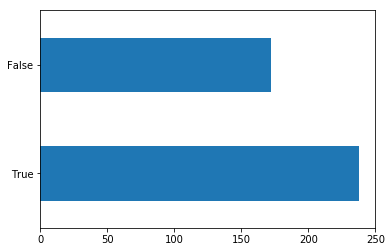

In [125]:
result_df['is_matched'].value_counts().plot.barh()
plt.show()